# KHÁM PHÁ DỮ LIỆU

In [27]:
# import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Đọc dữ liệu từ file csv

df = pd.read_csv('data/mxmh_survey_results_clean.csv')
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
1,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
2,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
3,18,Spotify,5,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
4,18,YouTube Music,3,Yes,Yes,No,Video game music,Yes,Yes,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,17,Spotify,2,Yes,Yes,No,Rock,Yes,Yes,120,...,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
662,18,Spotify,1,Yes,Yes,No,Pop,Yes,Yes,160,...,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
663,19,Other streaming service,6,Yes,No,Yes,Rap,Yes,No,120,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
664,19,Spotify,5,Yes,Yes,No,Classical,No,No,170,...,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve


## Thống kê và trực quan các cột dữ liệu để hiểu hơn về dữ liệu

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>1.Thống kê về tuổi</b></font>



**Các thông số thống kê ở cột `Age`**

In [29]:
age_distribution=df['Age'].describe().reset_index()
age_distribution

,index,Age
0,count,666.000000
1,mean,25.252252
2,std,11.828322
3,min,10.000000
4,25%,18.000000
5,50%,21.000000
6,75%,28.000000
7,max,80.000000


**Biểu đồ trực quan**

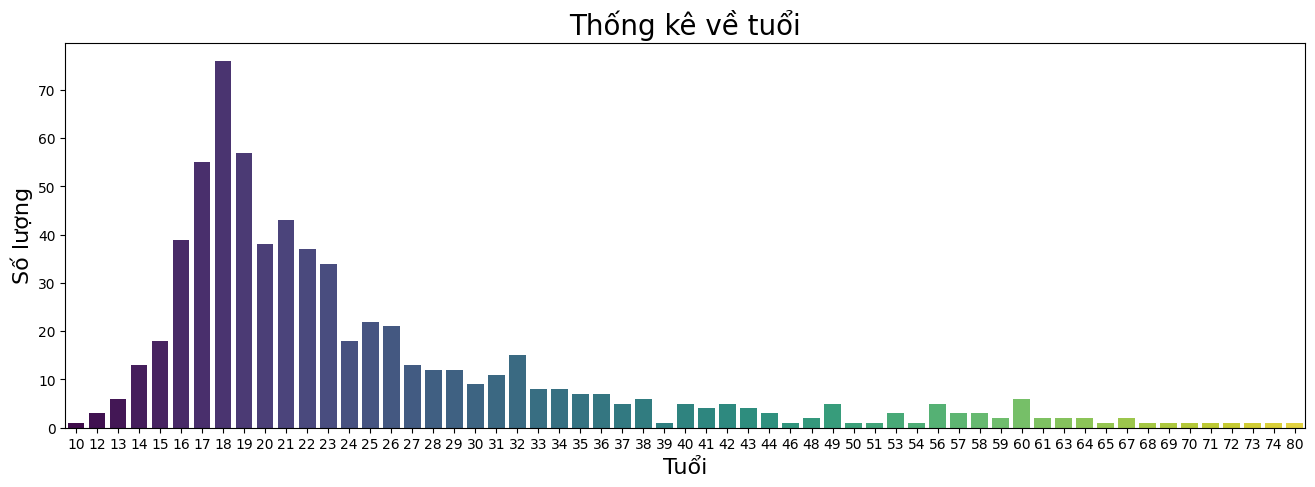

In [30]:
plt.figure(figsize=(16, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Age'].unique())))
for i, age in enumerate(sorted(df['Age'].unique())):
    sns.countplot(x=df[df['Age'] == age]['Age'], color=colors[i])

plt.title('Thống kê về tuổi', fontsize=20)
plt.xlabel('Tuổi', fontsize=16)
plt.ylabel('Số lượng', fontsize=16)
plt.savefig('images/3.0-1-age-distribution.png',dpi=300)
plt.show()

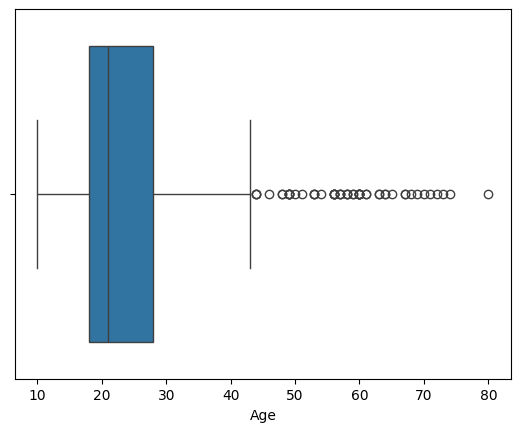

In [31]:
# Vẽ biểu đồ boxplot để miêu tả dữ liệu Age 
# print(df['Age'].describe().T)
sns.boxplot(x=df['Age'])
plt.savefig('images/3.0-1-age-boxplot.png',dpi=300)
plt.show()

- Dựa vào biểu đồ boxplot và histogram. Chúng ta có thể thấy đa phần độ tuổi tham gia khảo sát đều ở độ tuổi từ 18 đến 28 tuổi.
- Độ tuổi thấp nhất tham gia khảo sát là 10 tuổi và cao nhất là 58 tuổi.
- Độ tuôi trung bình tham gia khảo sát là 24 tuổi.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>2. Thống kê về dịch vụ nghe nhạc  </b></font>



</div>

**Thống kê cột `Primary streaming service`**

In [32]:
streaming_service = df['Primary streaming service'].value_counts()
streaming_service_df=streaming_service.reset_index()
streaming_service_df.columns=["Dịch vụ","Số lượng"]
streaming_service_df

,Dịch vụ,Số lượng
0,Spotify,412
1,YouTube Music,87
2,I do not use a streaming service.,63
3,Apple Music,47
4,Other streaming service,47
5,Pandora,10


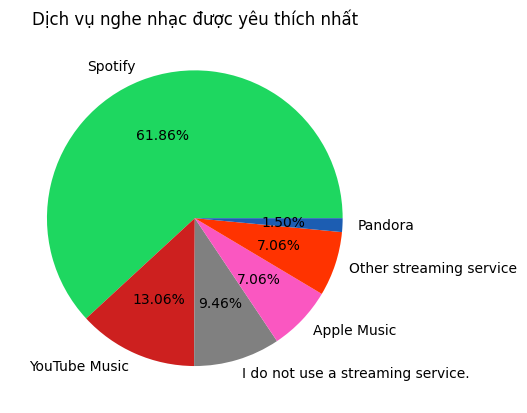

In [33]:
colors = {'Spotify': '#1ED760', 'Apple Music': '#FA57C1', 'YouTube Music': '#CD201F','Pandora': '#1C5DB2', 'I do not use a streaming service.': '#808080',  'Other streaming service': '#FF3300'}
colors_list = [colors[key] if key in colors else 'gray' for key in streaming_service.index]

plt.pie(streaming_service, labels=streaming_service.index, autopct='%.2f%%', colors=colors_list)
plt.title('Dịch vụ nghe nhạc được yêu thích nhất')
plt.savefig('images/3.0-2-streaming-service.png',dpi=300)
plt.show()

* Dịch vụ nghe nhạc của Spotify được nhiều người sử dụng nhất và chiếm phần lớn trong khảo sát với 62.01%
* Các dịch vụ nghe nhạc còn lại không chênh lệch nhiều, chỉ có Pandora là dịch vụ được sử dụng ít nhất, với 1.22%

**Độ tuổi nghe nhạc trên các nền tảng là gì ? Trên mỗi nền tảng độ tuổi nghe nhạc có khác nhau không?**

C:\Users\Admin\AppData\Local\Temp\ipykernel_19164\2670102434.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  streamyByAge = sns.boxplot(data=df, y="Primary streaming service", x = "Age",


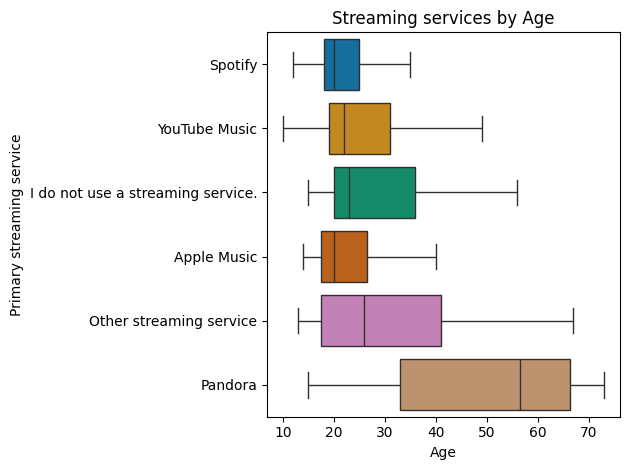

In [34]:
streamyByAge = sns.boxplot(data=df, y="Primary streaming service", x = "Age",
            showfliers = False,
            palette = "colorblind")

plt.yticks(rotation=0)
plt.title('Streaming services by Age')
plt.tight_layout()
plt.savefig('images/3.0-2-streaming-service-by-age.png',dpi=300)
plt.show()

* Nhìn chung ở các dịch vụ nghe nhạc đều không có sự chênh lệch về dộ tuổi, chỉ có những đáp viên dùng Pandora là có sự khác biệt rõ rệt với độ tuổi sử dụng là khá cao

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>3. Thống kê về số giờ nghe  </b></font>



</div>

**Thống kê cột `Hours per day`**

In [35]:
hour_distribution=df['Hours per day'].describe().reset_index()
hour_distribution

,index,Hours per day
0,count,666.000000
1,mean,3.027027
2,std,2.014800
3,min,0.000000
4,25%,2.000000
5,50%,3.000000
6,75%,4.000000
7,max,9.000000


**Trực quan hoá**

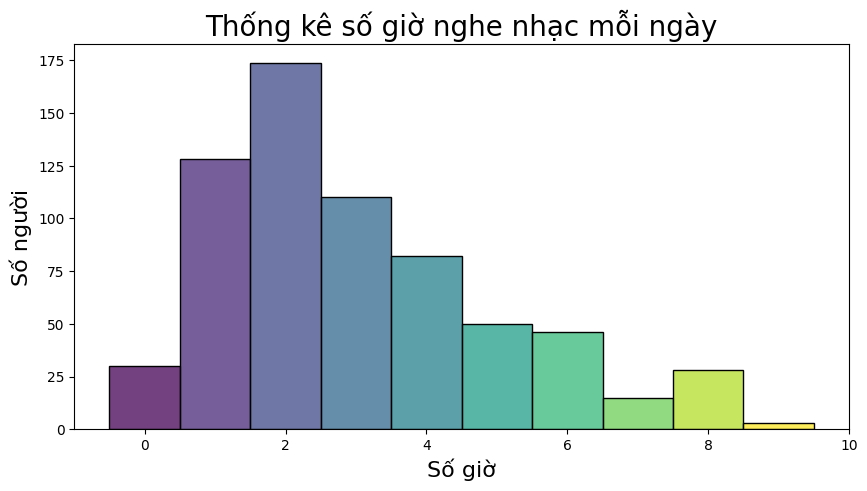

In [36]:
plt.figure(figsize=(10, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Hours per day'].unique())))
for i, age in enumerate(sorted(df['Hours per day'].unique())):
    sns.histplot(x=df[df['Hours per day'] == age]['Hours per day'], color=colors[i])

plt.title('Thống kê số giờ nghe nhạc mỗi ngày', fontsize=20)
plt.xlabel('Số giờ', fontsize=16)
plt.ylabel('Số người', fontsize=16)
plt.savefig('images/3.0-3-hours-per-day-distribution.png',dpi=300)
plt.show()

* Số giờ mà các đáp viên nghe nhạc nhiều nhất là 2 giờ, ít nhất là 9 giờ
* Số giờ có xu hướng giảm từ 3 giờ đến 9 giờ và từ 2 giờ dến 0 giờ

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>4. Thống kê về các thể loại nhạc yêu thích </b></font>

</div>

**Thống kê cột `Fav genre`**

In [37]:
fav_genre = df['Fav genre'].value_counts()
fav_genre_df=fav_genre.reset_index()
fav_genre_df.columns=["Thể loại yêu thích","Số lượng"]
fav_genre_df

,Thể loại yêu thích,Số lượng
0,Rock,167
1,Pop,111
2,Metal,77
3,Classical,50
4,Video game music,41
5,R&B,34
6,Hip hop,32
7,EDM,30
8,Folk,29
9,Country,24


**Trực quan hoá**

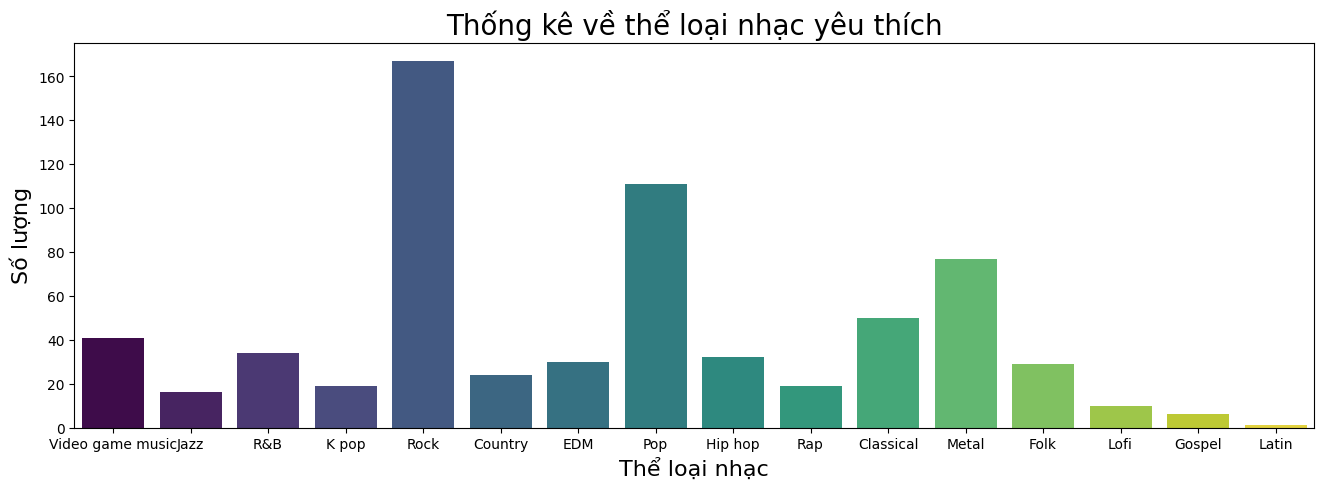

In [38]:
plt.figure(figsize=(16, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Fav genre'].unique())))
for i, genre in enumerate(df['Fav genre'].unique()):
    sns.countplot(x=df[df['Fav genre'] == genre]['Fav genre'], color=colors[i])

plt.title('Thống kê về thể loại nhạc yêu thích', fontsize=20)
plt.xlabel('Thể loại nhạc', fontsize=16)
plt.ylabel('Số lượng', fontsize=16)
plt.savefig('images/3.0-4-genre-distribution.png',dpi=300)
plt.show()

* Thể loại nhạc được yêu thích nhiều nhất là Rock, và ít nhất là Latin với Gospel

**Chúng ta tiếp tục khám phá xem thể loại nhạc yêu thích khác nhau theo độ tuổi và BPM của các thế loại đó**

**Theo độ tuổi**

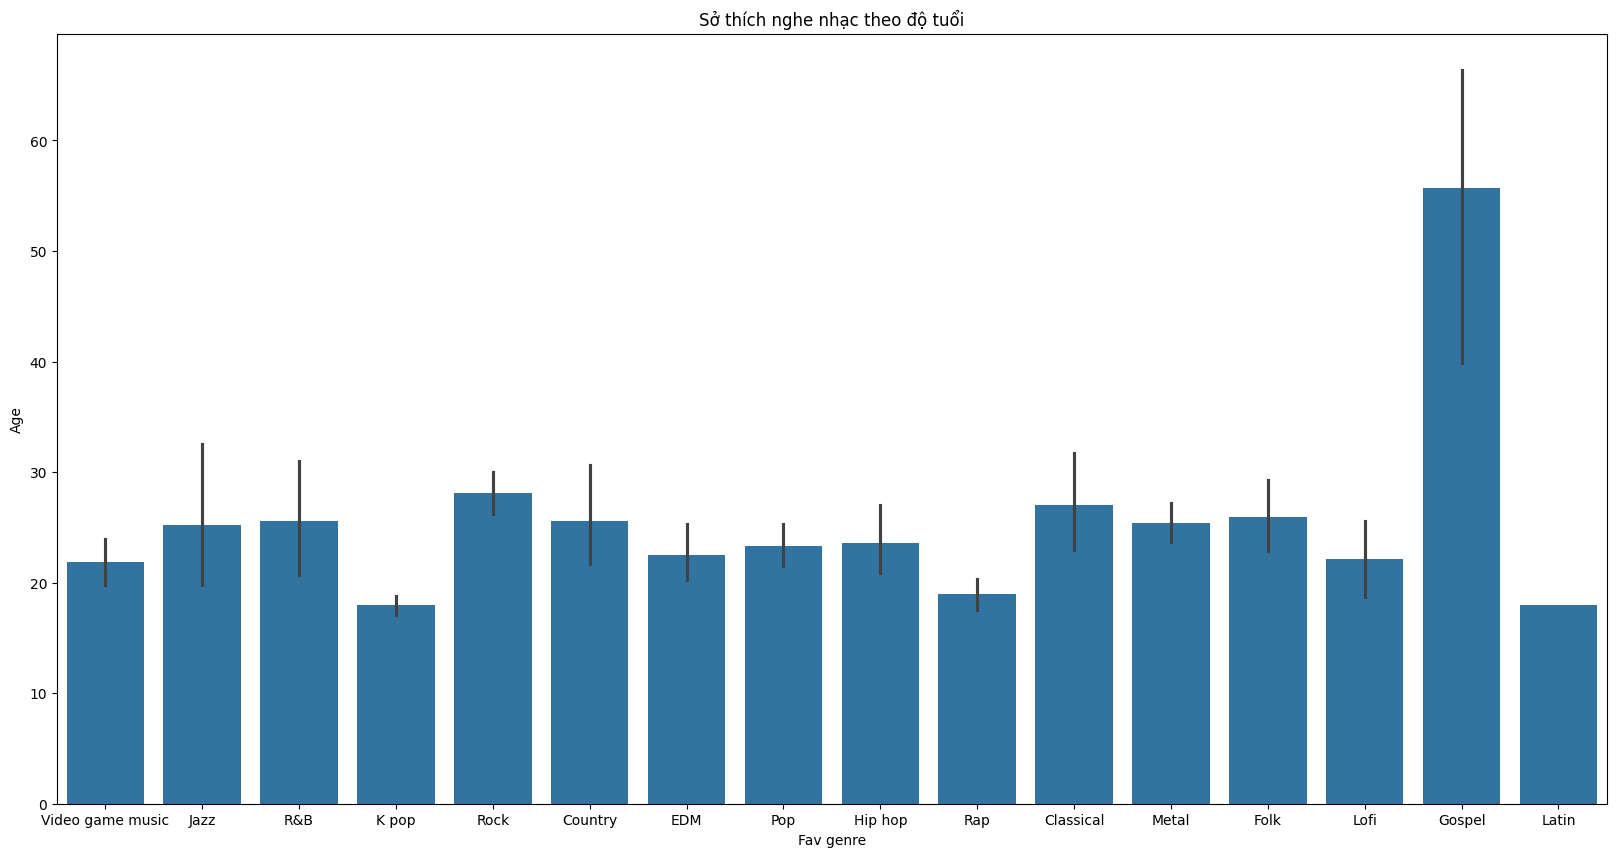

In [39]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="Fav genre", y="Age")
plt.title('Sở thích nghe nhạc theo độ tuổi')
plt.savefig('images/3.0-4-genre-age.png',dpi=300)
plt.show()

* Nhạc Kpop, Rap và nhạc Latin được các đáp viên trẻ yêu thích nhiều nhất
* Đối với các đáp viên lớn tuổi thì là nhạc Gospel
* Các thể loại nhạc còn lại không có khác biệt nhiều

**BPM của từng thể loại nhạc**

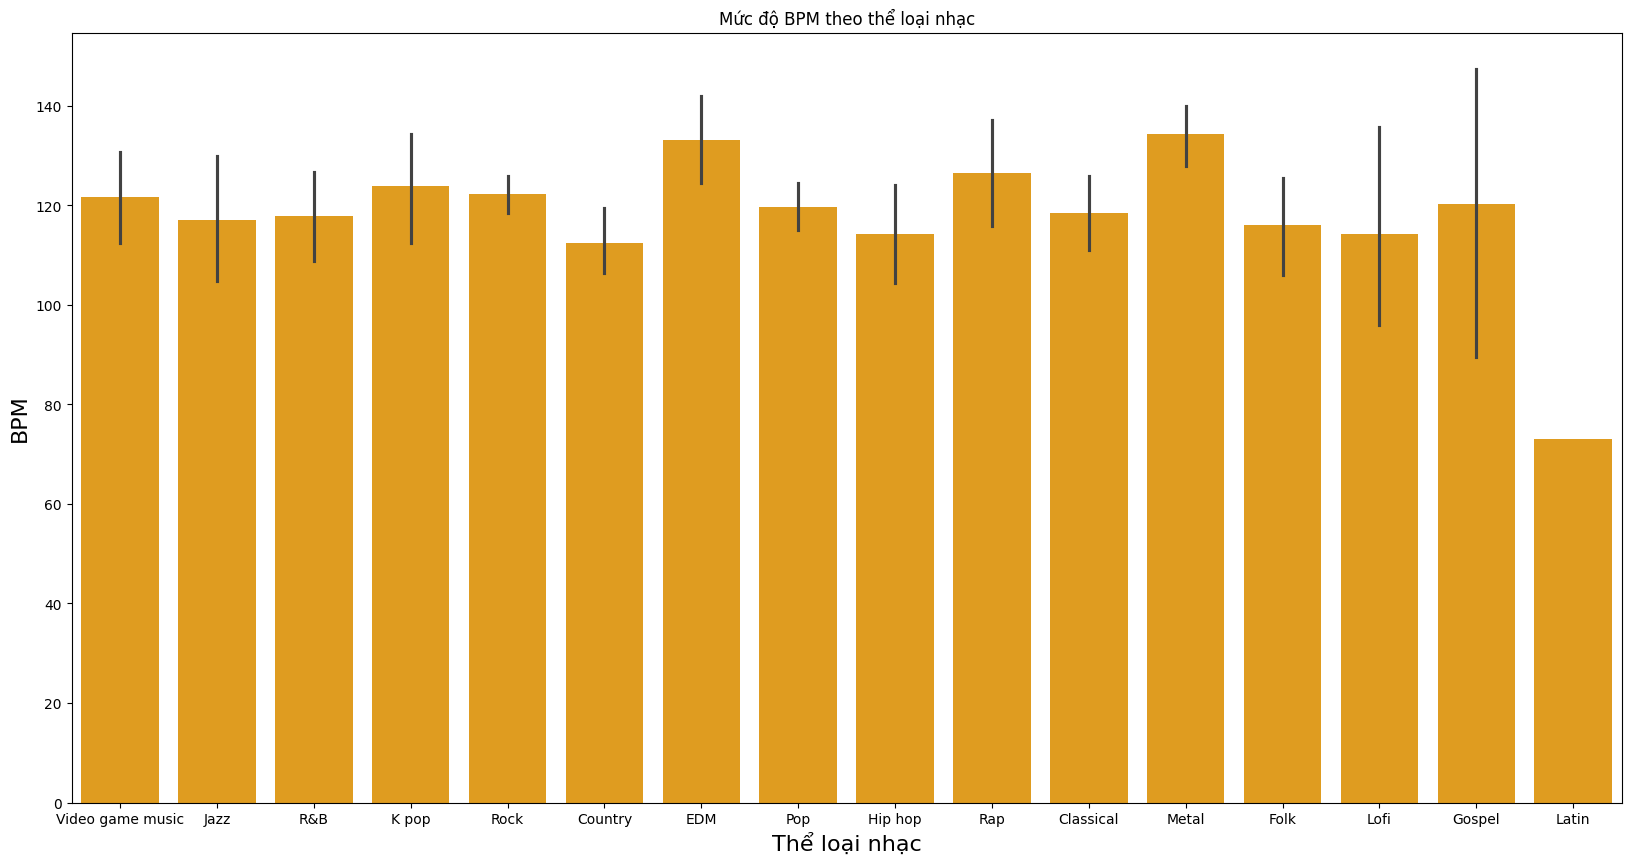

In [40]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="Fav genre", y="BPM",color='orange')
plt.title('Mức độ BPM theo thể loại nhạc')
plt.xlabel('Thể loại nhạc', fontsize=16)
plt.ylabel('BPM', fontsize=16)
plt.savefig('images/3.0-4-genre-bpm.png',dpi=300)
plt.show()

* BPM của thể loại EDM và Mental ở mức khá cao và cao nhất trong các thể loại nhạc.
* Mức BPM của Latin rất thấp, chênh lệch hoàn toàn so với phần còn lại, nhưng vì dữ liệu về thể loại Latin chỉ có 1 nên chúng ta sẽ tạm thời bỏ qua dòng nhạc này.
* Mức BPM trung bình thấp nhất là của thể loại Country.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>5. Khám phá các cột Yes/No </b></font>

</div>

**Thống kê các cột chỉ chứa giá trị Yes/No**

In [41]:
yes_no_colums = ['While working','Composer','Instrumentalist','Exploratory','Foreign languages']
yes_no_df = df[yes_no_colums]

def n_distribution(column):
    return column.value_counts()['No']

def y_distribution(column):
    return column.value_counts()['Yes']


yes_no_profile=yes_no_df.agg(lambda x: pd.Series({'No':n_distribution(x),'Yes':y_distribution(x)}))
yes_no_profile

,While working,Composer,Instrumentalist,Exploratory,Foreign languages
No,146,557,452,196,304
Yes,520,109,214,470,362


**Trực quan hoá**

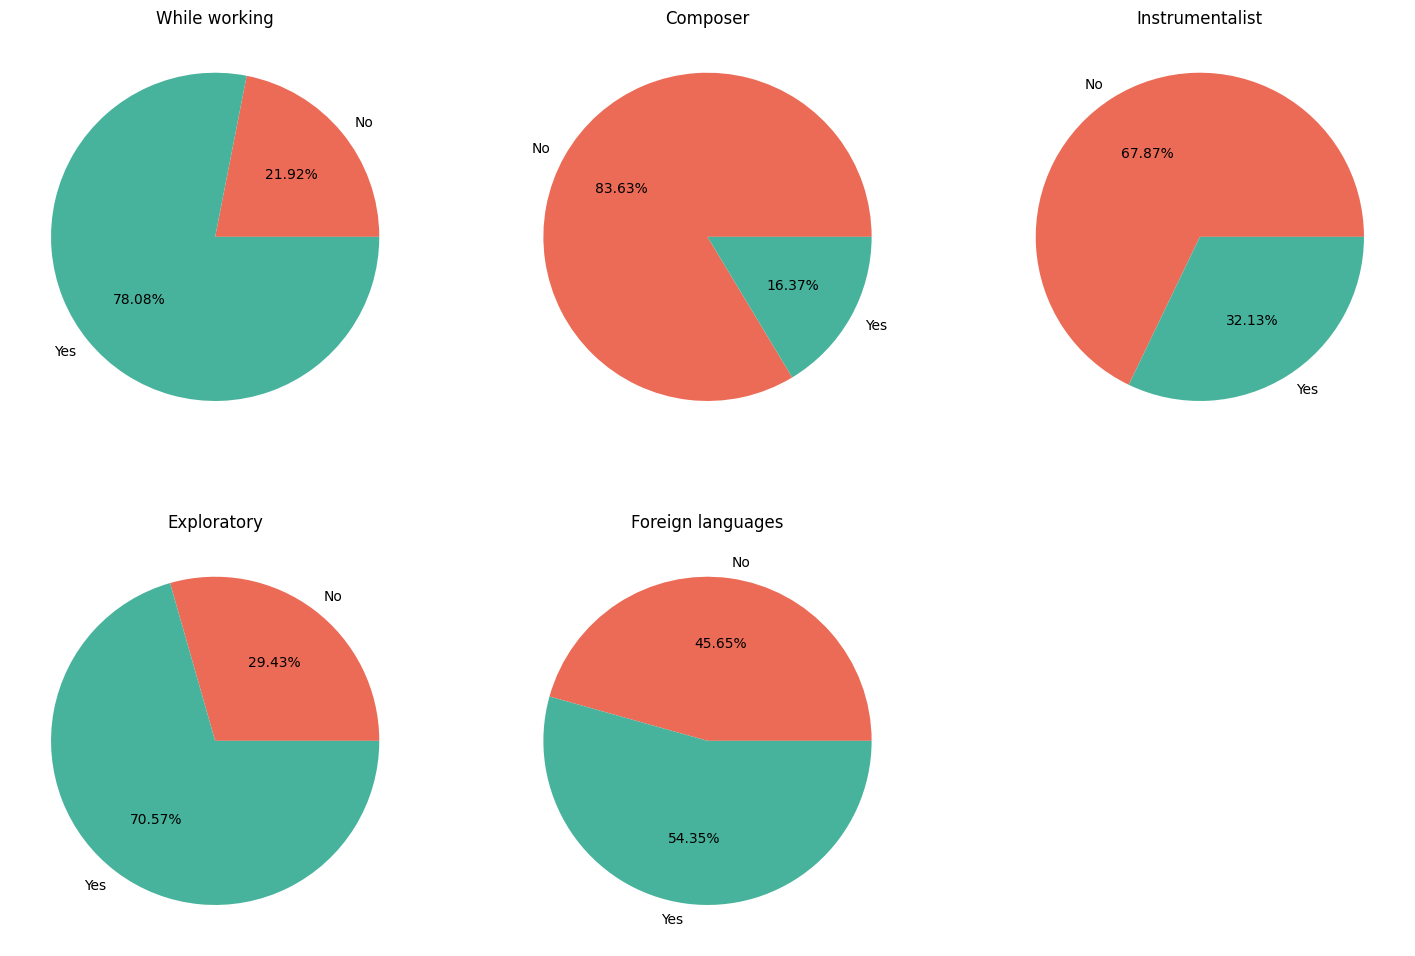

In [42]:
colors = {'Yes': '#47B39C', 'No': '#EC6B56'}

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0,0].pie(df['While working'].value_counts().sort_index(), labels=df['While working'].value_counts().sort_index().index, autopct='%.2f%%', colors=[colors[key] for key in df['While working'].value_counts().sort_index().index])
axs[0,0].set_title('While working')

axs[0,1].pie(df['Composer'].value_counts().sort_index(), labels=df['Composer'].value_counts().sort_index().index, autopct='%.2f%%', colors=[colors[key] for key in df['Composer'].value_counts().sort_index().index])
axs[0,1].set_title('Composer')

axs[0,2].pie(df['Instrumentalist'].value_counts().sort_index(), labels=df['Instrumentalist'].value_counts().sort_index().index, autopct='%.2f%%', colors=[colors[key] for key in df['Instrumentalist'].value_counts().sort_index().index])
axs[0,2].set_title('Instrumentalist')

axs[1,0].pie(df['Exploratory'].value_counts().sort_index(), labels=df['Exploratory'].value_counts().sort_index().index, autopct='%.2f%%', colors=[colors[key] for key in df['Exploratory'].value_counts().sort_index().index])
axs[1,0].set_title('Exploratory')

axs[1,1].pie(df['Foreign languages'].value_counts().sort_index(), labels=df['Foreign languages'].value_counts().sort_index().index, autopct='%.2f%%', colors=[colors[key] for key in df['Foreign languages'].value_counts().sort_index().index])
axs[1,1].set_title('Foreign languages')

axs[1,2].remove()

plt.savefig('images/3.0-5-yes_no.png',dpi=300)
plt.show()

* Hơn 78% người tham gia khảo sát nghe nhạc lúc đang làm việc
* Hầu hết mọi người chưa bao giờ sáng tạc nhạc, với hơn 83% chọn No
* Hơn 67% đã từng chơi nhạc cụ gần đây
* Khoảng 70% mọi người có xu hướng khám phá thêm các tác giả và thể loại nhạc mới
* Số lượng người có nghe nhạc nước ngoài tương đương với người không nghe, 46 so với 54%

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>6. Tần suất nghe nhạc của từng loại nhạc. </b></font>


</div>

**Thống kê ở các cột `Frequency`**

In [43]:
frequency_df=df.copy()
frequency_df = frequency_df=df.copy().filter(regex='Frequency')
frequency_df.rename(columns=lambda x: x.replace('Frequency', ''), inplace=True)
frequency_df.rename(columns=lambda x: x.replace('[', '').replace(']', ''), inplace=True)
melted_df = frequency_df.melt()
melted_df.rename(columns=lambda x: x.replace('variable', 'Genres'), inplace=True)
pivot=melted_df.pivot_table(index='Genres', columns='value', aggfunc='size')
pivot.head()

value,Never,Rarely,Sometimes,Very frequently
Genres,,,,
Classical,149,236,179,102
Country,307,214,99,46
EDM,279,177,132,78
Folk,265,200,133,68
Gospel,482,123,47,14


**Trực quan hoá**

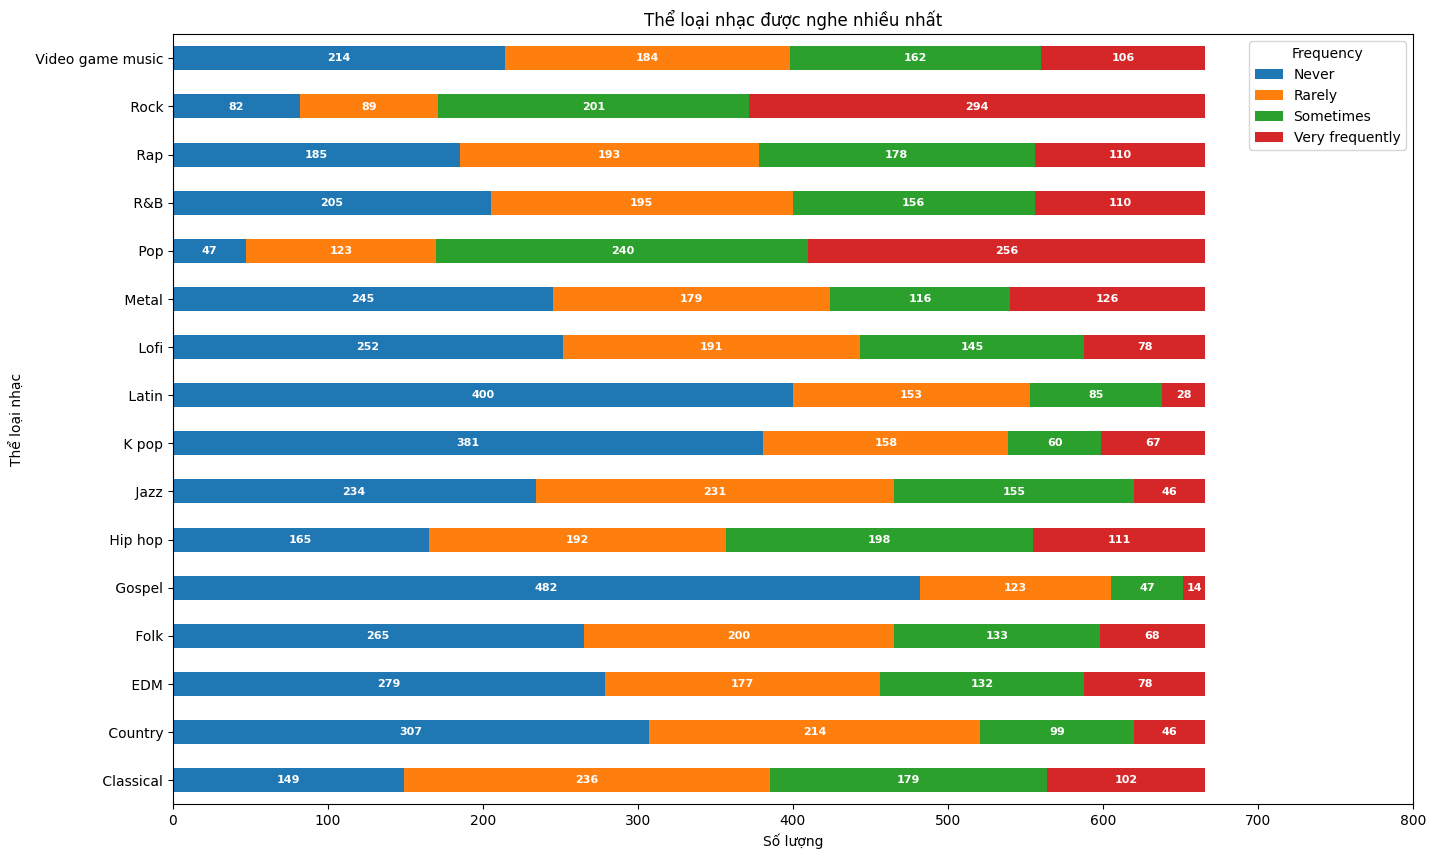

In [44]:
ax = pivot.plot(kind='barh', stacked=True, figsize=(16,10))


for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{int(width)}'
    label_x = x + width / 2
    label_y = y + height / 2

    if width > 0: 
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8, weight='bold', color='white')

plt.xlim(0,800)
plt.legend(title='Frequency', loc='upper right')
plt.title('Thể loại nhạc được nghe nhiều nhất')
plt.xlabel('Số lượng')
plt.ylabel('Thể loại nhạc')
plt.savefig('images/3.0-6-genre-frequency.png',dpi=300)
plt.show()

* Nhạc Rock là nhạc có số lượng nghe thường xuyên nhiều nhất, ít nhấy là Gospel
* Nhạc Gospel là nhạc có số người chưa bao giờ nghe là nhiều nhất, với nhạc Pop thì hầu như là ai cũng đã từng nghe

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>7. Việc nghe nhạc có cải thiện được sức khoẻ tinh thần không. </b></font>

</div>

**Thống kê cột `Music effects`**

In [45]:
music_effect = df['Music effects'].value_counts()
music_effect_df=music_effect.reset_index()
music_effect_df.columns=["Ảnh hưởng","Số lượng"]
music_effect_df

,Ảnh hưởng,Số lượng
0,Improve,495
1,No effect,155
2,Worsen,16


**Trực quan hoá**

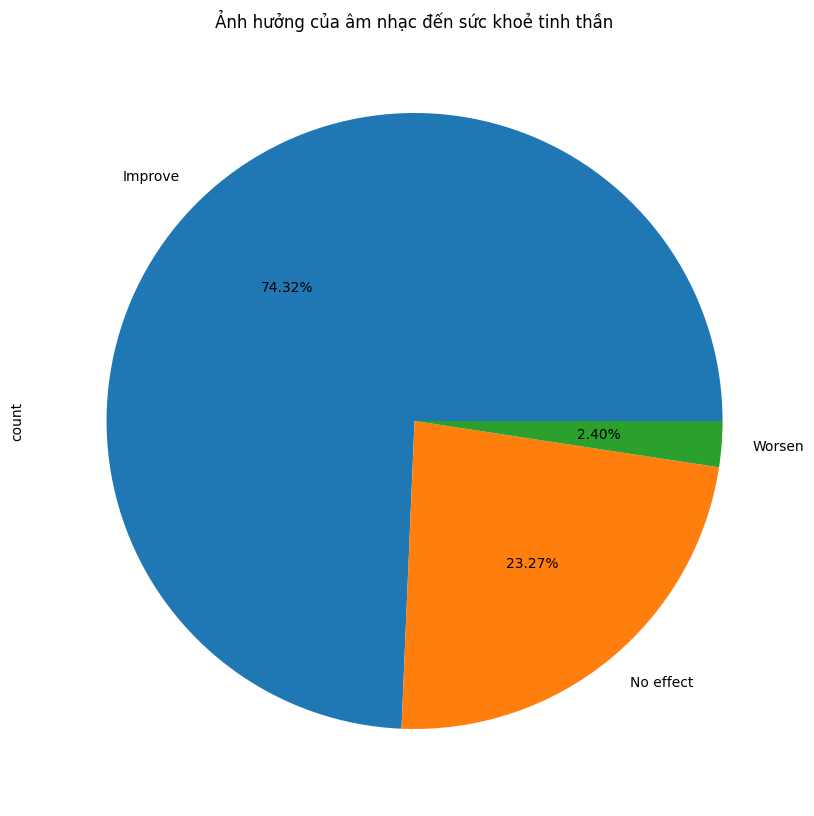

In [46]:
df['Music effects'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10, 10))
plt.title("Ảnh hưởng của âm nhạc đến sức khoẻ tinh thần")
plt.savefig('images/3.0-7-music-effects.png',dpi=300)
plt.show()

* Gần 3/4 số người tham gia khảo sát cho rằng việc nghe nhạc cải thiện được sức khoẻ tinh thần của họ
* Khoảng 23% cho biết rằng nghe nhạc không ảnh hưởng gì
* Và Có 2.43% những người tham gia khảo sát cảm thấy việc nghe nhạc đã làm cho tình trạng của họ tệ hơn

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>8. Mức độ bệnh của những người tham gia khảo sát. </b></font>


</div>

**Thống kê các cột về bệnh**

In [47]:
health_issues = ['OCD', 'Anxiety', 'Depression', 'Insomnia']
df_copy=df.copy()
health_issues_df=df_copy[health_issues]

health_issues_profile = health_issues_df.apply(lambda x: x.value_counts().reindex(range(0, 11), fill_value=0))
health_issues_profile = health_issues_profile.rename_axis('Mức độ')
health_issues_profile

,OCD,Anxiety,Depression,Insomnia
Mức độ,,,,
0,223,30,74,137
1,88,28,38,78
2,88,42,83,79
3,59,62,54,62
4,46,48,56,56
5,46,53,54,48
6,30,81,80,55
7,29,109,88,56
8,24,105,72,46


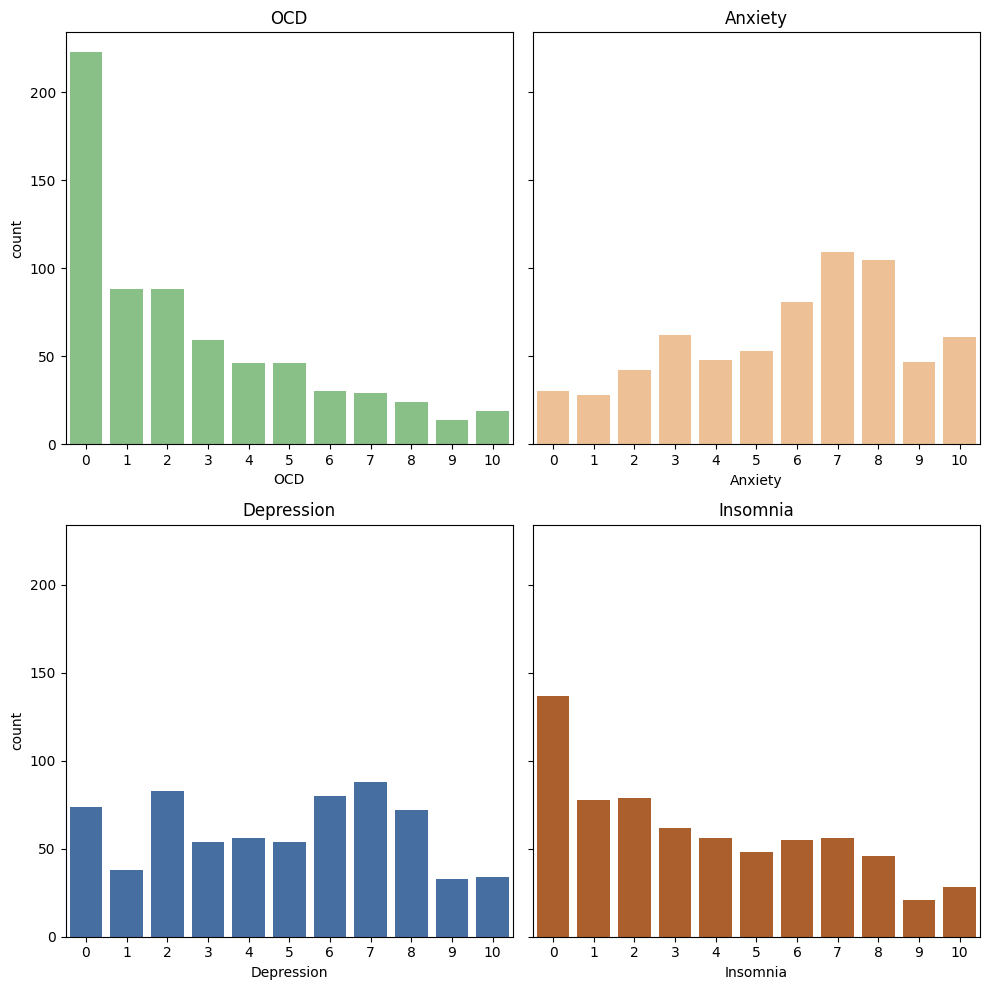

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for i, health_issue in enumerate(health_issues):
    color = plt.cm.Accent(i / len(health_issues))  # Choose a single color from the colormap
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=health_issue, ax=axs[row, col], color=color)  # Use the single color
    axs[row, col].set_title(health_issue)

plt.tight_layout()
plt.savefig('images/3.0-8-health-issues.png',dpi=300)
plt.show()

* Hầu hết mọi người đều không bị OCD, bị Mất ngủ ở mức nhẹ, và Lo lắng ở mức khá cao
* Mức độ trầm cảm được trải đều, cao nhất là ở mức 7

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>9. Độ tương quan giữa các cột numeric. </b></font>


</div>

**Thống kê mức độ tương quan giữa các cột số**

In [49]:
df_copy=df.copy()
df_copy = df_copy.select_dtypes(include=['int64','float64'])
corr = df_copy.corr()
corr

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.080485,-0.023908,-0.169020,-0.104194,0.032421,-0.124796
Hours per day,-0.080485,1.000000,-0.045530,0.068906,0.089070,0.135926,0.122564
BPM,-0.023908,-0.045530,1.000000,0.086288,0.066337,0.065990,-0.008496
Anxiety,-0.169020,0.068906,0.086288,1.000000,0.510855,0.287339,0.341362
Depression,-0.104194,0.089070,0.066337,0.510855,1.000000,0.366144,0.177163
Insomnia,0.032421,0.135926,0.065990,0.287339,0.366144,1.000000,0.236582
OCD,-0.124796,0.122564,-0.008496,0.341362,0.177163,0.236582,1.000000


**Trực quan bằng heatmap**

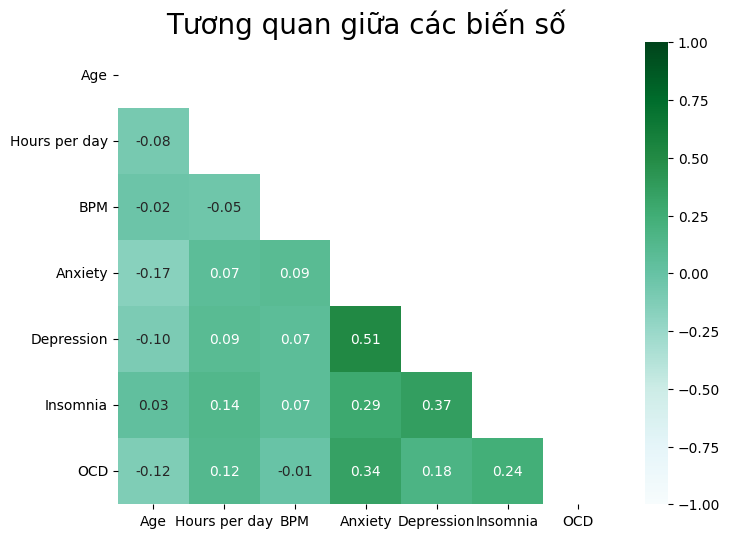

In [50]:


matrix = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr,mask=matrix,vmin=-1, vmax=1,annot=True,fmt=".2f",cmap='BuGn')

plt.title('Tương quan giữa các biến số', fontsize=20)
plt.savefig('images/3.0-9-correlation.png',dpi=300)
plt.show()

Dường như các cột số trong dữ liệu không có sự tương quan nào với nhau, chỉ số tương quan cao nhất là 0.51, và các chỉ số còn lại luôn rất thấp